In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('C:/Users/Harsh Upadhyay/Desktop/Kaggle PROJECTS/datapassword_strength.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [4]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
password_tuple=np.array(data)

In [8]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [9]:
import random
random.shuffle(password_tuple)

In [12]:
y=[i[1] for i in password_tuple]
X=[i[0] for i in password_tuple]

In [17]:
print(X[0:5])

['kzde5577', 'kzde5577', 'kzde5577', 'kino3434', 'visi7k1yr']


<AxesSubplot:xlabel='strength', ylabel='count'>

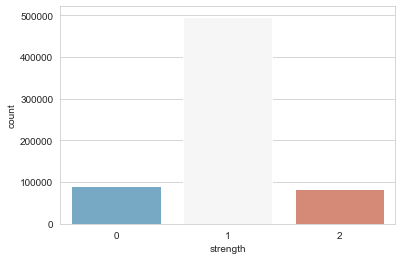

In [19]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [20]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [24]:
X.shape

(669639, 136)

In [25]:
vectorizer.vocabulary_

{'k': 62,
 'z': 77,
 'd': 55,
 'e': 56,
 '5': 35,
 '7': 37,
 'i': 60,
 'n': 65,
 'o': 66,
 '3': 33,
 '4': 34,
 'v': 73,
 's': 70,
 '1': 31,
 'y': 76,
 'r': 69,
 'a': 52,
 'q': 68,
 'l': 63,
 'm': 64,
 'g': 58,
 'f': 57,
 't': 71,
 'u': 72,
 '2': 32,
 '9': 39,
 '0': 30,
 '8': 38,
 '6': 36,
 'b': 53,
 'h': 59,
 'w': 74,
 'p': 67,
 'j': 61,
 'c': 54,
 '@': 45,
 '-': 27,
 'x': 75,
 '!': 17,
 '>': 43,
 '.': 28,
 '&': 22,
 '?': 44,
 '<': 41,
 ';': 40,
 '_': 50,
 '%': 21,
 '±': 91,
 '"': 18,
 '~': 81,
 '+': 26,
 '^': 49,
 '/': 29,
 '$': 20,
 ')': 24,
 '#': 19,
 ' ': 16,
 '(': 23,
 '*': 25,
 'ô': 120,
 'þ': 129,
 'ó': 119,
 '[': 46,
 ']': 48,
 '=': 42,
 '{': 78,
 '³': 93,
 'ú': 125,
 '\\': 47,
 '\x19': 12,
 '`': 51,
 '}': 80,
 '\x05': 3,
 '\x1b': 13,
 '\x1c': 14,
 'ä': 107,
 '¿': 101,
 '´': 94,
 '|': 79,
 '\x16': 10,
 'ò': 118,
 '·': 97,
 '\x1e': 15,
 '²': 92,
 '¾': 100,
 'å': 108,
 '‚': 132,
 'ð': 116,
 'â': 106,
 '÷': 123,
 'ÿ': 130,
 'á': 105,
 'º': 99,
 '¡': 86,
 'à': 104,
 '«': 88,
 '\x08

In [27]:
data.iloc[0,0]

'kzde5577'

In [28]:
feature_names = vectorizer.get_feature_names()
first_document_vector=X[0]
df=pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=['tfidf'])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591098
5,0.566790
z,0.336924
k,0.291674
d,0.286070
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [31]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
log_class = LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)
print(log_class.score(X_test,y_test))

C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.8129816020548354


C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#nultinomial
clf = LogisticRegression(random_state=0, multi_class='multinomial',solver='newton-cg')
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.8199928319694164


In [38]:
#sample test case
X_predict=np.array(['@rray12'])
X_predict=vectorizer.transform(X_predict)
y_predict=log_class.predict(X_predict)
print(y_predict)

[1]


In [39]:
#XGBoost
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_classifier.score(X_test,y_test)

C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9859103398841168

In [40]:
#multinomialNB
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)
nb_classifier.score(X_test,y_test)

0.7437503733349262